<a href="https://colab.research.google.com/github/kimtaeyoon1/pdm05/blob/main/notebook/chap07_MLP_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP: Keras

## mini-batch 구현

In [1]:
import numpy as np
import tensorflow as tf

# 데이터를 학습 데이터와 테스트 데이터로 나눈다. 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape,y_train.shape)
print(y_train[:10])
print(x_test.shape,y_test.shape)
print(y_test[:10])

data_size = x_train.shape[0]
batch_size = 12	# 배치 크기

selected = np.random.choice(data_size, batch_size)
print(selected)
x_batch = x_train[selected]
y_batch = y_train[selected]
x_batch.shape,y_batch.shape


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
[5 0 4 1 9 2 1 3 1 4]
(10000, 28, 28) (10000,)
[7 2 1 0 4 1 4 9 5 9]
[36969 36167 24135 57145 27816 19788 59415 44100 34759 21873 31946 12018]


((12, 28, 28), (12,))

## mini-batch: XOR using MLP

In [2]:
import numpy as np
# XOR solution by MLP

# 시그모이드 함수
def actf(x):
	return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치
def actf_deriv(x):
	    return x*(1-x)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

# 훈련 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

# 가중치를 –1.0에서 1.0 사이의 난수로 초기화한다.
W1 = 2*np.random.random((inputs, hiddens))-1   
W2 = 2*np.random.random((hiddens, outputs))-1  
B1 = np.zeros(hiddens)   
B2 = np.zeros(outputs)   

# 순방향 전파 계산
def predict(x):
        layer0 = x			# 입력을 layer0에 대입한다. 
        Z1 = np.dot(layer0, W1)+B1	# 행렬의 곱을 계산한다. 
        layer1 = actf(Z1)		# 활성화 함수를 적용한다. 
        Z2 = np.dot(layer1, W2)+B2	# 행렬의 곱을 계산한다. 
        layer2 = actf(Z2)		# 활성화 함수를 적용한다. 
        return layer0, layer1, layer2
    
# 역방향 전파 계산
def fit():
    global W1, W2, B1, B2
    for i in range(60000):
            layer0, layer1, layer2 = predict(X) # input-batch-size = 4
            layer2_error = layer2-T

            layer2_delta = layer2_error*actf_deriv(layer2)
            layer1_error = np.dot(layer2_delta, W2.T)
            layer1_delta = layer1_error*actf_deriv(layer1)
            
            W2 += -learning_rate*np.dot(layer1.T, layer2_delta)/4.0 # 4개의 입력에 대한 평균 기울기
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta)/4.0
            B2 += -learning_rate*np.sum(layer2_delta, axis=0)/4.0
            B1 += -learning_rate*np.sum(layer1_delta, axis=0)/4.0

def test():
    for x, y in zip(X, T):
        x = np.reshape(x, (1, -1))		# 하나여도 2차원 형태이어야 한다.
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)

fit()
test()
W1,W2
B1,B2


[[0 0]] [0] [[0.01265937]]
[[0 1]] [1] [[0.98671362]]
[[1 0]] [1] [[0.98672645]]
[[1 1]] [0] [[0.01635222]]


(array([2.67089436, 7.39152912]), array([-4.85078545]))

---
# Tensorflow-Keras
---

## MLP XOR in Keras
- 1-은닉층
- 2-은닉층

In [ ]:
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=2, input_shape=(2,), activation='sigmoid')) #①
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #②		
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.SGD(lr=0.3)) 

model.summary()
 
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=10000, verbose=2)

print(model.predict(X))

# [[0.0156148 ]
#  [0.98538893]
#  [0.9820687 ]
#  [0.01398213]]

In [3]:
# 2-은닉층
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=2, input_shape=(2,), activation='sigmoid')) #①
model.add(tf.keras.layers.Dense(units=4, activation='sigmoid')) #
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #		
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.SGD(lr=0.3)) 

model.summary()

X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=10000, verbose=0)

print(model.predict(X))

# [[0.00956685]
#  [0.9900732 ]
#  [0.9919224 ]
#  [0.00822851]]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
 dense_6 (Dense)             (None, 4)                 12        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
[[0.01235728]
 [0.9891216 ]
 [0.9881406 ]
 [0.01066031]]


## Mnist model using Keras
1. Sequential model
2. Functional model
3. Subclassing model

### Data loading

(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)


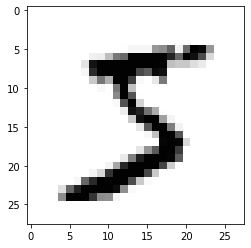

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np

(train_images, train_labels), (test_images, test_labels)	= tf.keras.datasets.mnist.load_data()

print(train_images.shape)

print(train_labels)
print(test_images.shape)

plt.imshow(train_images[0], cmap="Greys")
plt.show()

### Data preprocessing
- Reshape
- Normalization
- One-hot encoding

In [11]:
#
# dataset: train, test
#
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

print(train_images.shape, train_labels.shape)

(60000, 784) (60000, 10)


## 1. Sequential model

In [12]:
# Model
model = models.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['accuracy'])        

Epoch 1/5
469/469 - 1s - loss: 0.0161 - accuracy: 0.9148 - 1s/epoch - 3ms/step
Epoch 2/5
469/469 - 1s - loss: 0.0064 - accuracy: 0.9653 - 1s/epoch - 2ms/step
Epoch 3/5
469/469 - 1s - loss: 0.0045 - accuracy: 0.9765 - 1s/epoch - 2ms/step
Epoch 4/5
469/469 - 1s - loss: 0.0035 - accuracy: 0.9821 - 1s/epoch - 2ms/step
Epoch 5/5
469/469 - 1s - loss: 0.0028 - accuracy: 0.9862 - 1s/epoch - 2ms/step


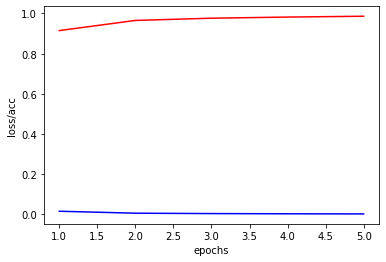

In [13]:
# Training with history
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=2)
# training graph
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

In [14]:
# test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 0.9798
테스트 정확도: 0.9797999858856201


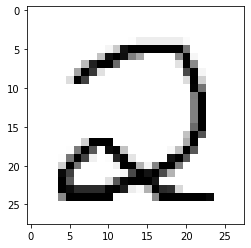

추정된 숫자= 2
1.1188792


In [15]:
# Test with new image
import cv2 as cv

image = cv.imread('test.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
# plt.imshow(image.reshape(28, 28),cmap='Greys')
# plt.show()
image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

pred = model.predict(image.reshape(1, 784), batch_size=1)
print("추정된 숫자=", pred.argmax())
print(np.sum(pred))

## 2. Functional model

In [17]:
#
# Model2 - Functional
#

inputs = layers.Input(shape=(784,))

x = layers.Dense(512, activation='relu')(inputs)
output = layers.Dense(10, activation='sigmoid')(x)

model = models.Model(inputs=inputs, outputs=output)

model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['accuracy'])  

Epoch 1/5
469/469 - 2s - loss: 0.0159 - accuracy: 0.9159 - 2s/epoch - 3ms/step
Epoch 2/5
469/469 - 1s - loss: 0.0063 - accuracy: 0.9657 - 1s/epoch - 2ms/step
Epoch 3/5
469/469 - 1s - loss: 0.0044 - accuracy: 0.9768 - 1s/epoch - 2ms/step
Epoch 4/5
469/469 - 1s - loss: 0.0035 - accuracy: 0.9824 - 1s/epoch - 2ms/step
Epoch 5/5
469/469 - 1s - loss: 0.0028 - accuracy: 0.9863 - 1s/epoch - 3ms/step


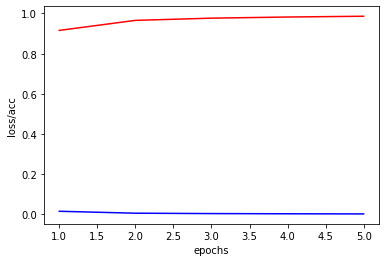

313/313 [==============================] - 1s 2ms/step - loss: 0.0038 - accuracy: 0.9793
테스트 정확도: 0.9793000221252441


In [18]:
# Training with history
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=2)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

# test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

## 3. Subclassing model

In [19]:
#
# Model3 - Class
#

class MnistMLP(models.Model):
    
    def __init__(self, num_classes):
        super(MnistMLP, self).__init__(name='mlp')
        self.num_classes = num_classes
        
        self.dense1 = layers.Dense(512, activation='relu')
        self.dense2 = layers.Dense(10, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)
    
# model
model = MnistMLP(num_classes=10)

model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['accuracy'])           

Epoch 1/5
469/469 - 2s - loss: 0.0124 - accuracy: 0.9180 - 2s/epoch - 3ms/step
Epoch 2/5
469/469 - 1s - loss: 0.0054 - accuracy: 0.9659 - 1s/epoch - 3ms/step
Epoch 3/5
469/469 - 1s - loss: 0.0038 - accuracy: 0.9764 - 1s/epoch - 3ms/step
Epoch 4/5
469/469 - 1s - loss: 0.0028 - accuracy: 0.9823 - 1s/epoch - 3ms/step
Epoch 5/5
469/469 - 1s - loss: 0.0023 - accuracy: 0.9867 - 1s/epoch - 3ms/step


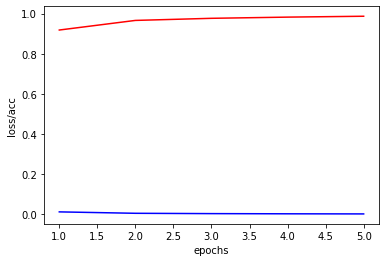

313/313 [==============================] - 1s 2ms/step - loss: 0.0031 - accuracy: 0.9796
테스트 정확도: 0.9796000123023987


In [20]:
# Training with history
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=2)

loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

# test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

---
# Hyperparameter search
- Grid search
---

In [22]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
# import numpy as np 
# import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
# OS warning cure
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# 데이터 세트 준비
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
                             
# 신경망 모델 구축
def build_model():
    network = tf.keras.models.Sequential()
    network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    network.add(tf.keras.layers.Dense(10, activation='sigmoid'))

    network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return network

# 하이퍼 매개변수 딕셔너리
param_grid = {
              'epochs':[1, 2, 3],	# 에포크 수: 1, 2, 3
              'batch_size':[32, 64, 100]	# 배치 크기: 32, 64, 100
             }

# 케라스 모델을 scikeras에서 사용하도록 포장한다. 
model = KerasClassifier(model = build_model, verbose=1)

## Elapsed time start
import time
start = time.time()

# 그리드 검색
gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid, 
    cv=3, 
    # n_jobs=-1 # comment this line to avoid out-of-memory
)

# 그리드 검색 결과 출력
grid_result = gs.fit(train_images, train_labels)

## Elapsed time end
end = time.time()
print('Elapsed time:', end - start) # Elapsed time: 122.5, 189.5

print(grid_result.best_score_) # 0.9725, 0.9711
print(grid_result.best_params_) # {'batch_size': 64, 'epochs': 3}


625/625 [==============================] - 1s 2ms/step
Epoch 1/2
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2395 - accuracy: 0.9296
Epoch 2/2
625/625 [==============================] - 1s 1ms/step
Epoch 1/2
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2367 - accuracy: 0.9293
Epoch 2/2
625/625 [==============================] - 1s 1ms/step
Epoch 1/2
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2381 - accuracy: 0.9299
Epoch 2/2
625/625 [==============================] - 1s 1ms/step
Epoch 1/3
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2361 - accuracy: 0.9292
Epoch 2/3
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1032 - accuracy: 0.9693
Epoch 3/3
625/625 [==============================] - 1s 1ms/step
Epoch 1/3
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2383 - accuracy: 0.9299
Epoch 2/3
1250/1250 [==============================] - 3s 2ms/step - loss: 0.10